# EDA on million playlist data

Since the complete dataset is too large, a subset of 10% is used for EDA here.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Combine the first 100 csv files
dfs=[]
for i in range(0,100):
    filename='songs'+str(i)+'.csv'
    df=pd.read_csv(filename)
    df['pid']+= i*1000
    dfs.append(df)
df_final=pd.concat(dfs)
df_final.to_csv('test0-99.csv', encoding='utf-8', index=False)
del dfs
del df_final

In [3]:
#load data
df1=pd.read_csv('test0-99.csv')

In [4]:
#overview
df1.head()

,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
0,0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook
1,0,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone
2,0,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit)
3,0,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified
4,0,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot


In [3]:
df1.shape

(6677800, 9)

For each playlist, we have data on track name, artist, album and length of the songs.

In [4]:
len(df1['track_uri'].unique())

681805

In [5]:
len(df1['artist_uri'].unique())

110063

In [6]:
len(df1['album_uri'].unique())

271413

Over these 100000 playlists, there are 681805 different songs, 110063 different artists and 271413 different albums covered.

In [7]:
df1_track=df1.groupby(['pid'])['track_uri'].unique()
df1_artist=df1.groupby(['pid'])['artist_uri'].unique()
df1_album=df1.groupby(['pid'])['album_uri'].unique()

In [8]:
track_1=np.zeros(len(df1_track), dtype=int)
for i in range(len(df1_track)):
    track_1[i]=len(df1_track[i])  
    
artist_1=np.zeros(len(df1_artist), dtype=int)
for i in range(len(df1_artist)):
    artist_1[i]=len(df1_artist[i])  
    
album_1=np.zeros(len(df1_album), dtype=int)
for i in range(len(df1_album)):
    album_1[i]=len(df1_album[i]) 

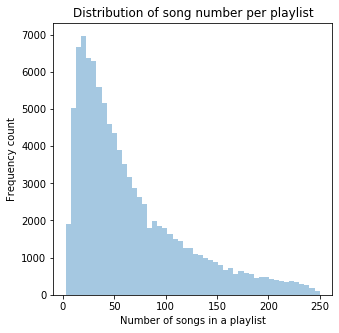

In [11]:
plt.figure(figsize=(5,5))
sns.distplot(track_1,kde=False)
plt.xlabel("Number of songs in a playlist")
plt.ylabel("Frequency count")
plt.title("Distribution of song number per playlist")
plt.show()

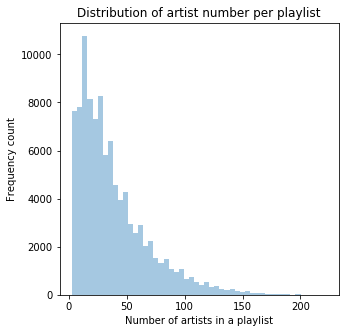

In [12]:
plt.figure(figsize=(5,5))
sns.distplot(artist_1,kde=False)
plt.xlabel("Number of artists in a playlist")
plt.ylabel("Frequency count")
plt.title("Distribution of artist number per playlist")
plt.show()

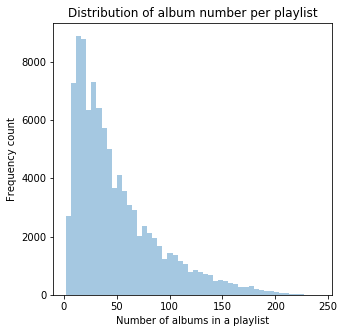

In [13]:
plt.figure(figsize=(5,5))
sns.distplot(album_1,kde=False)
plt.xlabel("Number of albums in a playlist")
plt.ylabel("Frequency count")
plt.title("Distribution of album number per playlist")
plt.show()

The histograms show that distribution of songs/artists/albums number are quite skewed. 

In [12]:
df1_summary = pd.DataFrame({'Number of songs per playlist': track_1, 
                            'Number of artists per playlist': artist_1, 
                            'Number of albums per playlist': album_1})


In [13]:
df1_summary.describe()

,Number of songs per playlist,Number of artists per playlist,Number of albums per playlist
count,100000.000000,100000.000000,100000.000000
mean,65.890790,38.121690,49.789870
std,52.849538,30.171495,39.888158
min,3.000000,3.000000,2.000000
25%,26.000000,16.000000,20.000000
50%,49.000000,30.000000,37.000000
75%,91.000000,52.000000,68.000000
max,250.000000,222.000000,242.000000


Next, We explore what are the TOP 50 most popular songs/artists.

In [9]:
df2=df1.drop(columns=['pos'])
df2.shape

(6677800, 8)

In [11]:
df2=df2.drop_duplicates()

In [12]:
df2.head()

,pid,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook
1,0,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone
2,0,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit)
3,0,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified
4,0,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot


In [13]:
track_freq=df2.groupby( [ "track_name", "track_uri","artist_name",'artist_uri'] ).size().to_frame(name = 'Hits').reset_index()
track_freq=track_freq.sort_values("Hits", ascending=False)
track_freq.columns = ['Track name', 'Track uri', 'Artist name','Artist uri', 'Hits']
track_freq['Track-Artist']=track_freq['Track name'].astype(str) + '|'+track_freq['Artist name']


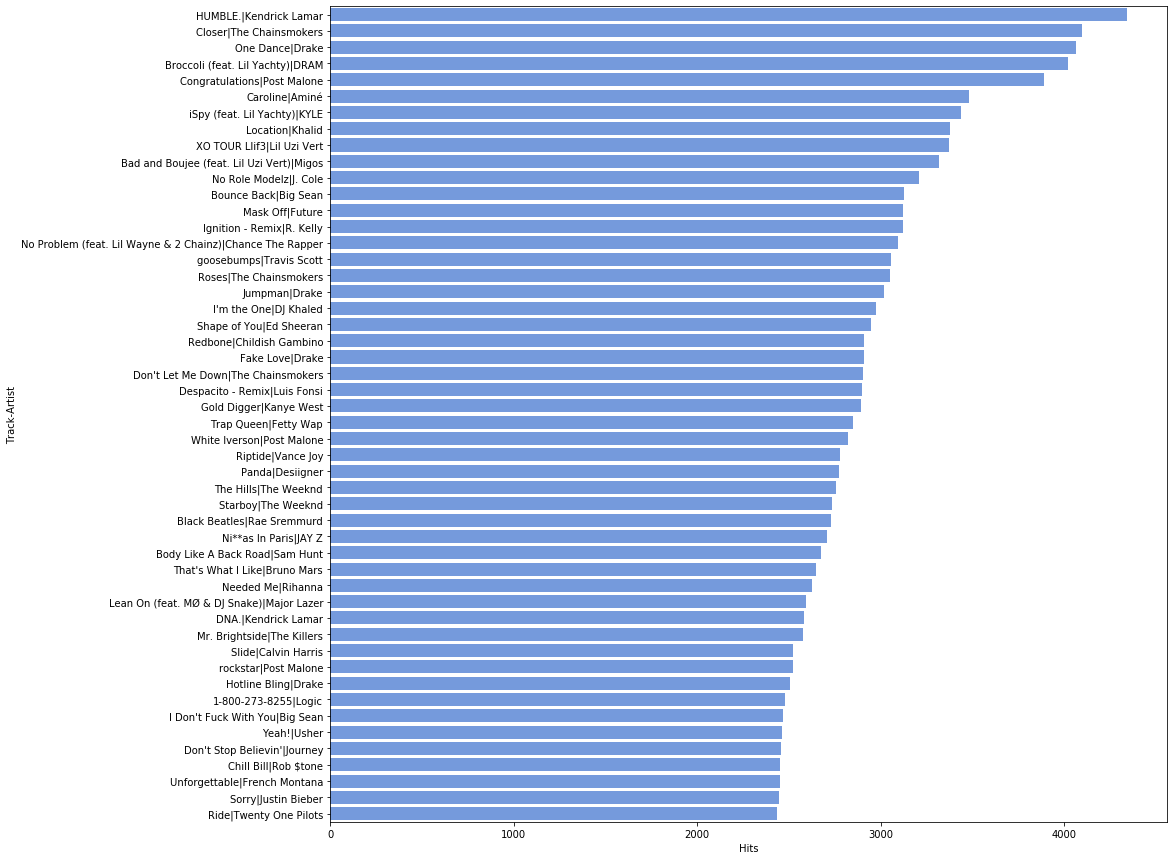

In [15]:
plt.figure(figsize=(15,15))
sns.barplot(x="Hits", y="Track-Artist", color='cornflowerblue',data=track_freq[:50])
plt.show()

In [16]:
artist_freq=df2.groupby( [ "artist_name",'artist_uri'] ).size().to_frame(name = 'Hits').reset_index()
artist_freq=artist_freq.sort_values("Hits", ascending=False)
artist_freq.columns = ['Artist name','Artist uri', 'Hits']

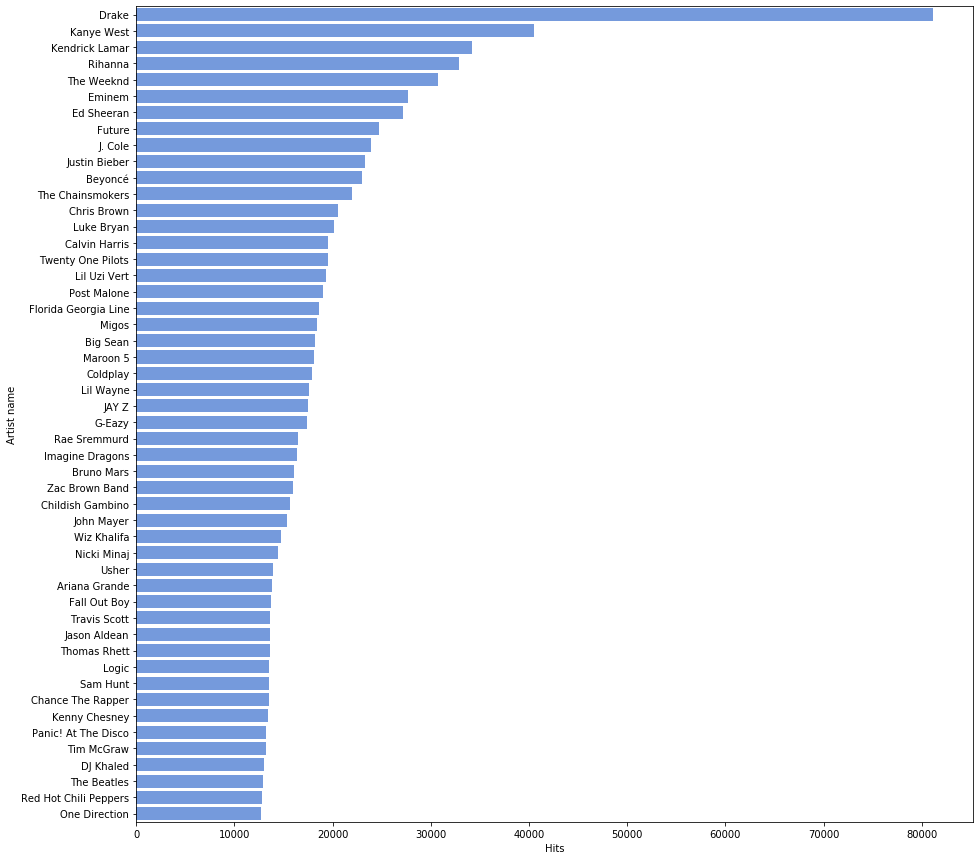

In [17]:
plt.figure(figsize=(15,15))
sns.barplot(x="Hits", y="Artist name", color='cornflowerblue',data=artist_freq[:50])
plt.show()

In [18]:
len(set(track_freq['Artist uri'][:50]))

40

In [19]:
len(set(track_freq['Artist uri'][:50]).intersection(set(artist_freq['Artist uri'][:50])))

26

In [20]:
intersec=set(set(track_freq['Artist uri'][:50]).intersection(set(artist_freq['Artist uri'][:50])))
i=0
for each in list(track_freq['Artist uri'][:50]):
    if each in intersec:
        i+=1
        
print(i)

36


Among the TOP 50 artists, 25 of them own credit for the TOP 50 songs. Among the TOP 50 songs, 36 of them come from TOP 50 artists. The popularity of songs and corresponding artists are highly correlated.